# **0.Importamos las librerias**

In [ ]:
import pandas as pd
import numpy as np
#Viz
import matplotlib.pyplot as plt
import seaborn as sns
#T student para evaluar
from scipy.stats import ttest_ind
#Train-test
from sklearn.model_selection import train_test_split
#Normalizacion de variables
from sklearn.preprocessing import StandardScaler
#Regresion Logistica, KNN y DecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#Metricas de evaluacion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#Montamos el drive
from google.colab import drive
drive.mount('/content/drive')
#PCA
from sklearn.decomposition import PCA
import plotly.express as px
#SMOTE
from imblearn.over_sampling import SMOTE
#Algoritmos KNN y arboles

Mounted at /content/drive


**Objetivo principal aplicar técnicas de machine learning para desarrollar un modelo predictivo de fuga de clientes en la industria de las telecomunicaciones. El modelo resultante permitirá identificar a los clientes en riesgo de abandonar los servicios de la empresa y tomar acciones preventivas para retenerlos. A través de este enfoque, se busca mejorar la retención de clientes, aumentar la satisfacción y mejorar el rendimiento general de la empresa en un entorno altamente competitivo.**

# **1.Realizar un análisis exploratorio de los datos para comprender las características y la distribución de los datos y 2. Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización de las características según sea necesario.**

In [ ]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Machine Learning/3.Aprendizaje supervisado y no supervisado Parte II/Desafio/Telco-Customer-Churn.xlsx") #Leemos el archivo excel
print(df.shape) #7043,21 - Revisamos las dimensiones del dataset
print("")
df.head() #Visualizamos

(7043, 21)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()#Vemos los dtypes
dup = df.duplicated().sum()#Revisamos los duplicados si hubiesen.
print("")
print("La cantidad de duplicados en el dataset son:",dup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
nulos = df.isnull().sum()
print(f"La cantidad de registros nulos por columna en el dataset son:\n{nulos}")

La cantidad de registros nulos por columna en el dataset son:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


**Realizaremos un drop de los registros con valores nulos ya que son pocos y no deberían afectar de sobremanera si los eliminamos.**

In [ ]:
df_drop = df.dropna()
print(f"El dataset pasó de tener {df.shape[0]} a tener {df_drop.shape[0]} registros luego del drop de nulls.")

El dataset pasó de tener 7043 a tener 7032 registros luego del drop de nulls.


**Ahora separamos la data en variables numericas y no numericas para ver como se componen**

In [ ]:
all_cols = df_drop.columns.to_list()
num_cols = [column for column in all_cols if df_drop[column].dtypes in [int,float]]
notnum_cols = [column for column in all_cols if column not in num_cols]

print("Las columnas numericas son:",num_cols)
print("Las columnas no numericas son:",notnum_cols)

Las columnas numericas son: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Las columnas no numericas son: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


**Revisaremos primero los valores en las columnas no numericas**

In [ ]:
for column in notnum_cols:
  print(f"Valores de la columna {column}")
  print(df_drop[column].unique())
  print("")


Valores de la columna customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Valores de la columna gender
['Female' 'Male']

Valores de la columna Partner
['Yes' 'No']

Valores de la columna Dependents
['No' 'Yes']

Valores de la columna PhoneService
['No' 'Yes']

Valores de la columna MultipleLines
['No phone service' 'No' 'Yes']

Valores de la columna InternetService
['DSL' 'Fiber optic' 'No']

Valores de la columna OnlineSecurity
['No' 'Yes' 'No internet service']

Valores de la columna OnlineBackup
['Yes' 'No' 'No internet service']

Valores de la columna DeviceProtection
['No' 'Yes' 'No internet service']

Valores de la columna TechSupport
['No' 'Yes' 'No internet service']

Valores de la columna StreamingTV
['No' 'Yes' 'No internet service']

Valores de la columna StreamingMovies
['No' 'Yes' 'No internet service']

Valores de la columna Contract
['Month-to-month' 'One year' 'Two year']

Valores de la columna PaperlessBilling
['Yes' 'No']


**Tambien podemos revisar ahora cuantos fugados hay en el dataset**

In [ ]:
df_drop["Churn"].value_counts("%") #Aqui podemos ver que un 26% de los clientes estan clasificados como fugados

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Como podemos apreciar, existe un desbalance de clases, el cual intentaremos disminuir más adelante antes de ejecutar el algoritmo para poder tener buenas metricas de desempeño en la matriz de confusión.

**Ahora revisaremos las columnas numericas, describiendolas y graficandolas**

In [ ]:
df_num = df_drop[num_cols]
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


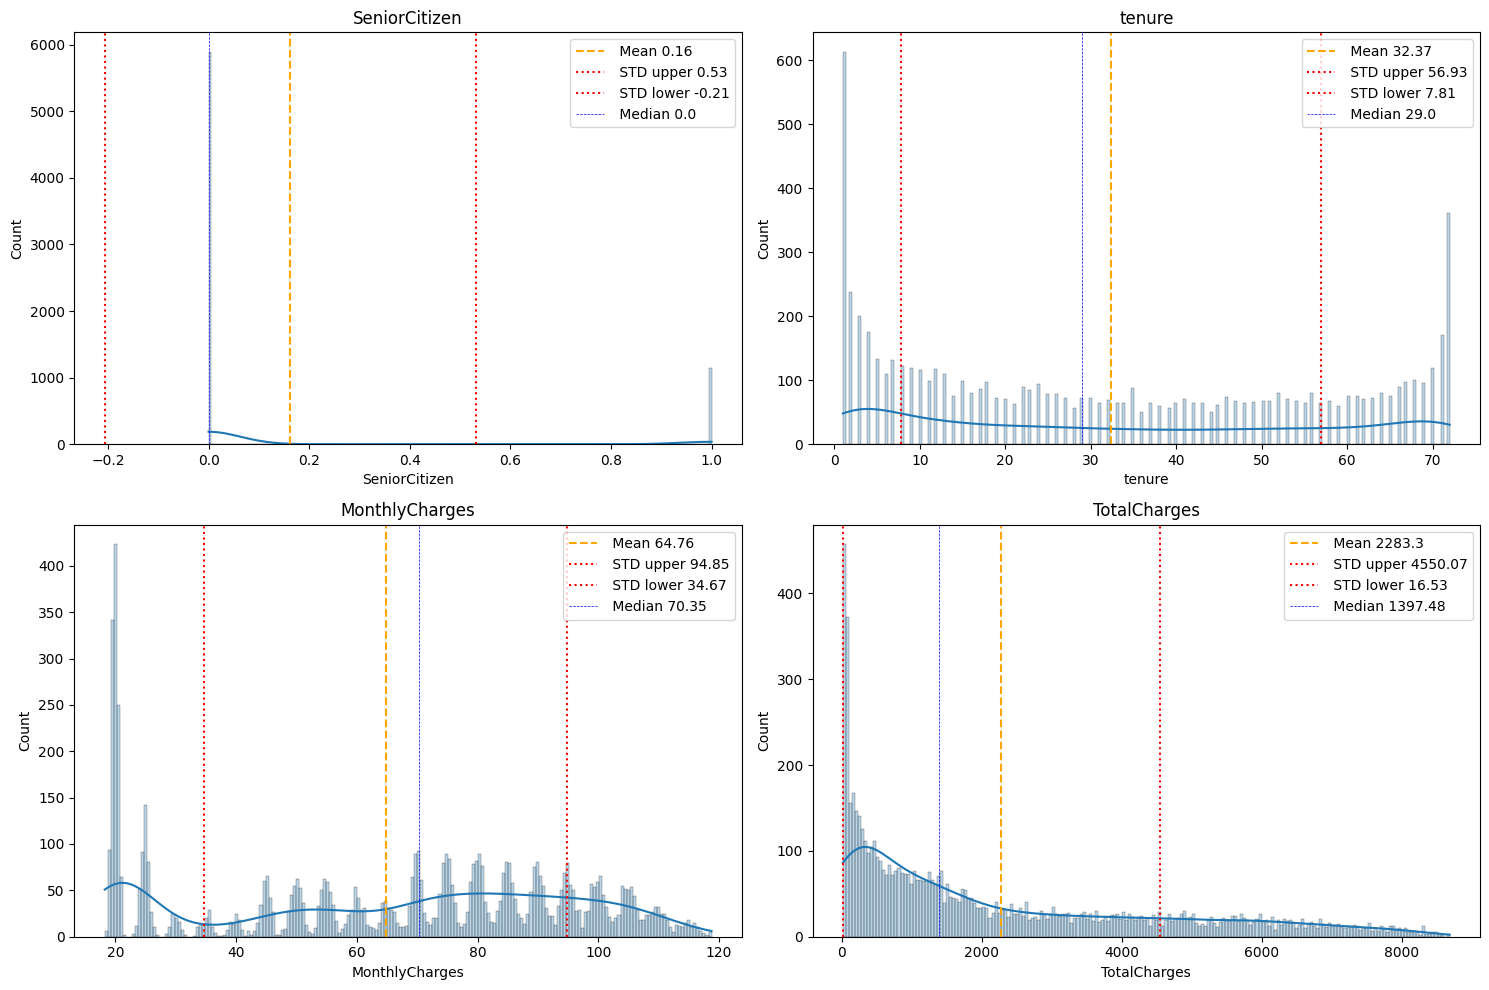

In [ ]:
row=2
cols = int(df_num.shape[1]/row)
fig, axs = plt.subplots(row,cols,figsize=(15,10
                                    ))

for index, colname in enumerate(df_num.columns):
  plt.subplot(row,cols,index+1)
  sns.histplot(df_num[colname],kde=True,bins=200,alpha=0.3)
  plt.axvline(df[colname].mean(),color="orange",ls="--",label=f" Mean {round(df[colname].mean(),2)}") #Mean
  plt.axvline(df[colname].mean()+df[colname].std(),color="red",ls=":",label=f" STD upper {round(df[colname].mean()+df[colname].std(),2)}") #STD
  plt.axvline(df[colname].mean()-df[colname].std(),color="red",ls=":",label=f" STD lower {round(df[colname].mean()-df[colname].std(),2)}") #STD
  plt.axvline(df[colname].median(),color="blue",ls="dashed",lw=0.5,label=f" Median {round(df[colname].median(),2)}") #Median
  plt.title(colname)
  plt.legend()
plt.tight_layout()
plt.show()

**Senior Citizen** = Presenta valores numericos que representan un criterio booleano, por lo que solo tenemos 0 y 1.

**Tenure** = La cual representa la cantidad de meses suscrito al servicio, como podemos ver no se distribuye de manera normal, si no de manera más uniforme, la cual se puede ver en la curva de densidad de probabilidad, que es más o menos constante.

**MonthlyCharges**= Los cargos mensuales tambien distribuyen de una forma más cercana a una distribución uniforme.

**TotalCharges**= Los cargos totales distribuyen de manera sesgada a la derecha.

En general, las 4 variables numericas presentan rangos de desviación estandar bastante alejados de la media, lo que era esperable al no tener distribuciones del tipo normal.


**Limpiaremos los outliers de las 3 colummnas, pero primero visualizaremos con un boxplot para asegurarnos si existen**

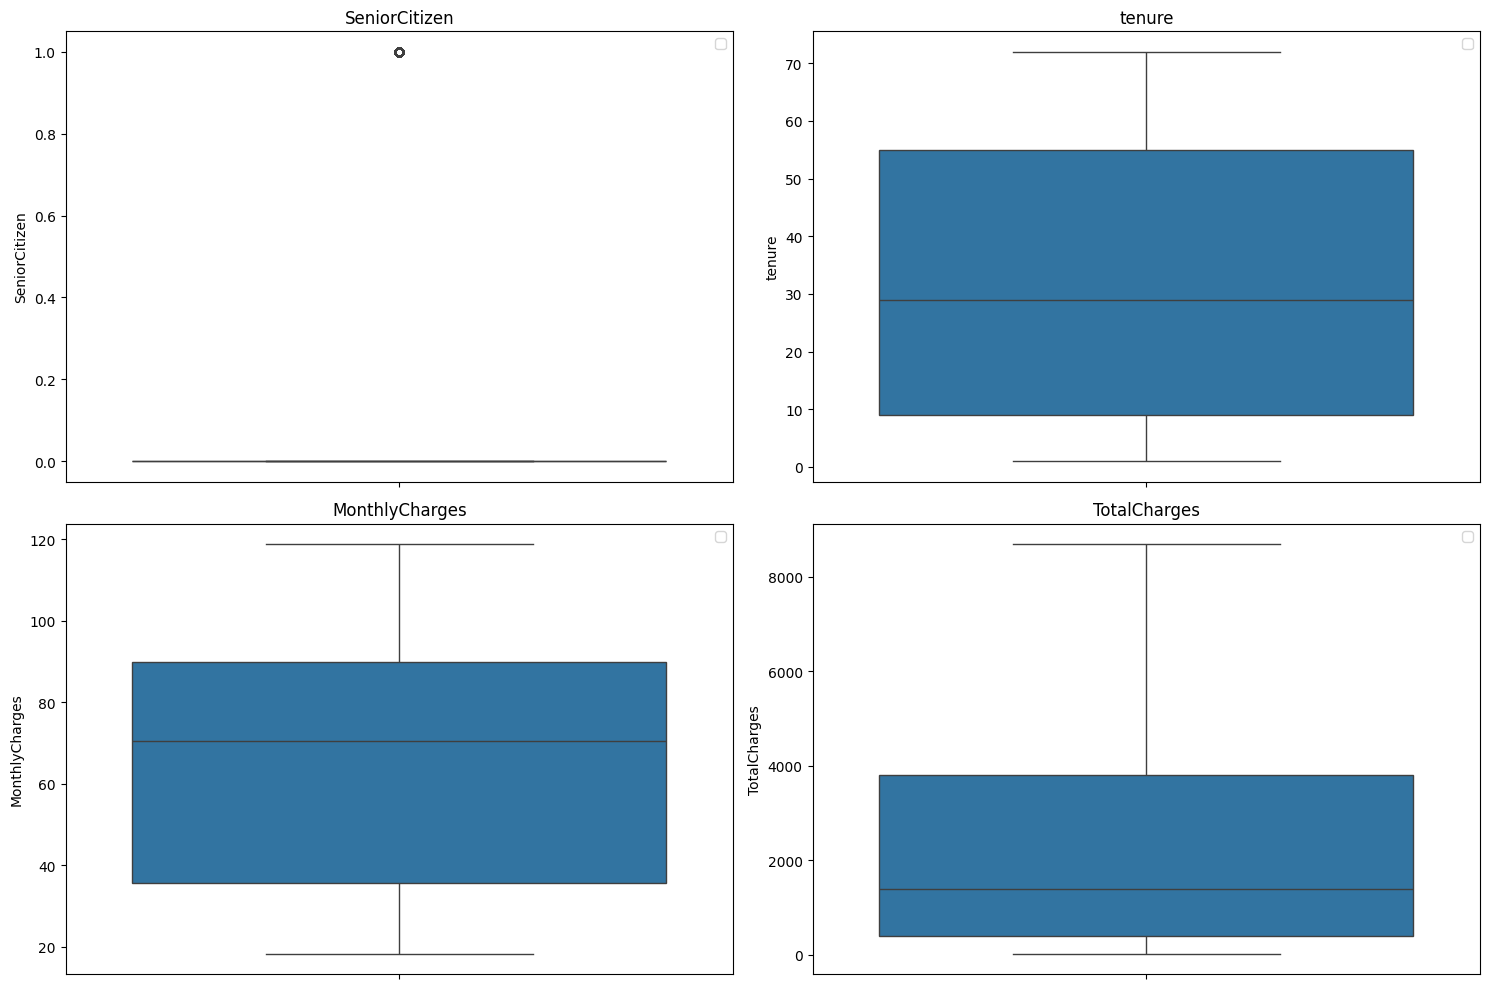

In [ ]:
row=2
cols = int(df_num.shape[1]/row)
fig, axs = plt.subplots(row,cols,figsize=(15,10
                                    ))

for index, colname in enumerate(df_num.columns):
  plt.subplot(row,cols,index+1)
  sns.boxplot(df_num[colname])
  plt.title(colname)
  plt.legend()
plt.tight_layout()
plt.show()

Podemos ver que las 4 columnas numericas no presentan outliers a simple vista, sin embargo de todas formas ejecutaremos la funcion para limpieza.

In [ ]:
 columns_to_clean = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
def clean_outliers(df,columns):

  Q1= df[columns].quantile(0.25)
  Q3= df[columns].quantile(0.75)
  IQR= Q3-Q1
  LOWER= (Q1 - 1.5 * IQR)
  UPPER= (Q3 + 1.5 * IQR)

  for col in columns:
    df_clean = df[(df[col] >= LOWER[col]) & (df[col] <= UPPER[col])]

  return df_clean

In [ ]:
df_clean = clean_outliers(df_drop,columns_to_clean)
df_clean.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Analisis de correlaciones**

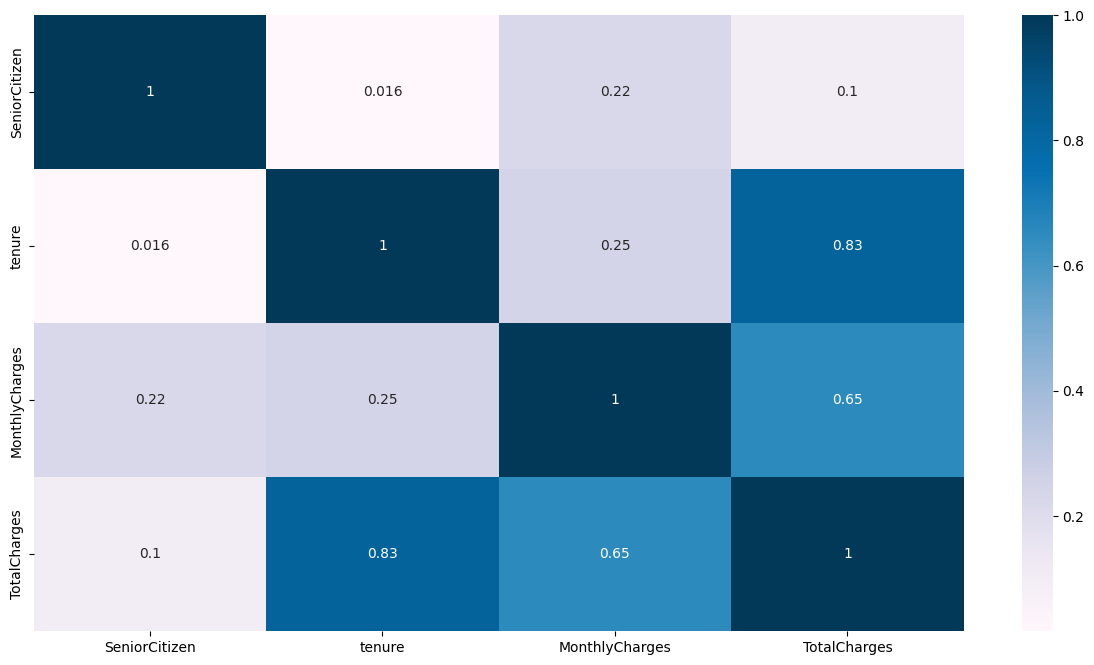

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_clean.corr(numeric_only=True),annot=True,cmap=plt.cm.PuBu)
plt.show()

Podemos ver una correlación positiva considerablemente alta entre TotalCharges con Ternure que es la cantidad de meses que se ha estado suscrito al servicio, lo cual es esperable ya que funcionan por acumulación. De la misma forma y comportamiento entre MonthlyCharges con TotalCharges, ya que una es la suma total de la otra.

**Definición de variables estadisticamente relevantes para predecir la fuga:**

**Prepararemos la data para realizar pruebas estadisticas como la t de student que nos permita identificarlas**

In [ ]:
#Varibles con recodificación simple
gender_dic = {"Male": 1, "Female": 0 }
yes_no_dic = {"Yes": 1, "No": 0 }

df_clean["gender"] = df_clean["gender"].replace(gender_dic).astype(int)
df_clean["Partner"] = df_clean["Partner"].replace(yes_no_dic).astype(int)
df_clean["Dependents"] = df_clean["Dependents"].replace(yes_no_dic).astype(int)
df_clean["PhoneService"] = df_clean["PhoneService"].replace(yes_no_dic).astype(int)
df_clean["PaperlessBilling"] = df_clean["PaperlessBilling"].replace(yes_no_dic).astype(int)

test_one = df_clean[["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","PaperlessBilling","MonthlyCharges","TotalCharges","Churn"]]
test_one

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,29.85,No
1,1,0,0,0,34,1,0,56.95,1889.50,No
2,1,0,0,0,2,1,1,53.85,108.15,Yes
3,1,0,0,0,45,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,No
7039,0,0,1,1,72,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,29.60,346.45,No
7041,1,1,1,0,4,1,1,74.40,306.60,Yes


In [ ]:
#Variables a recodificar a través de get dummies, para no caer en una recodificación matemática simple que iguale el peso.
test_two = df_clean[["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod","Churn"]]
to_get = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]

test_two = pd.get_dummies(test_two,columns=to_get) #Aplicamos el dummies en todas las otras columnas menos la objetivo.
test_two

,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,No,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Yes,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,No,0,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Yes,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,0,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
7039,No,0,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
7040,No,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,Yes,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


Ahora que tenemos todas las variables de forma numérica y representando fielmente la data, haremos las pruebas de la t de student para ambos grupos de variables, las recodificadas de manera simple con un replace y las que le ejecutamos un get dummies para ver cuales son las más importantes a considerar para predecir. Es importante indicar que esto lo estamos haciendo entendiendo que no tenemos el conocimiento del negocio como tal, ya que esto podría simplificarse consultando a expertos/contrapartes que nos ayuden a definir rapidamente cuales son las que se deben considerar.

***Testeo grupo 1 de variables***

In [ ]:
def t_hipotesis(df,objetivo):
  # Lista para almacenar el resultado de la prueba de significancia
  significance = []

  # Ciclo sobre cada columna, menos Churn
  for column in df.columns:
      if column != 'Churn':
          # Dividir los datos en dos grupos: clientes que abandonaron (churn) y los que no
          group_churn = df[df[objetivo] == 'Yes'][column]
          group_no_churn = df[df[objetivo] == 'No'][column]

          # Realizar la prueba t de Student para comparar las medias de los dos grupos
          t_statistic, p_value = ttest_ind(group_churn, group_no_churn)

          # Almacenar el resultado de la prueba de significancia
          significance.append((column, p_value))

  # Ordenar los resultados por valor p
  significance.sort(key=lambda x: x[1])

  # Imprimir los resultados
  for feature, p_value in significance:
      print(f"{feature}: p-value = {p_value}")

  print("")
  # Seleccionar las características más significativas basadas en un valor de corte de p-value
  significant_features = [feature for feature, p_value in significance if p_value < 0.05]
  print("Features significativas:", significant_features)
  print("")
  print("Numero de features significativas:",len(significant_features))


In [ ]:
t_hipotesis(test_one,"Churn")

tenure: p-value = 9.437650217574845e-207
TotalCharges: p-value = 4.876865689694505e-64
MonthlyCharges: p-value = 6.760843117980302e-60
PaperlessBilling: p-value = 4.879248128739473e-59
Dependents: p-value = 3.896536305268996e-43
SeniorCitizen: p-value = 6.3772947115970886e-37
Partner: p-value = 1.1712904936197436e-36
PhoneService: p-value = 0.32695528135482677
gender: p-value = 0.47373573732077046

Features significativas: ['tenure', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'Dependents', 'SeniorCitizen', 'Partner']

Numero de features significativas: 7


**Resultados grupo 1: Podemos ver que por los P-values, las categorias que no son estadisticamente suficientes para rechazar la hipotesis nula de que no afectan a variable Churn, son las variables Gender y PhoneService, lo que es interesante de descubrir ya se podría deducir erróneamente que por ejemplo, los hombres son más propensos a fugarse de servicios de telecomunicaciones. Sobre el Phone Service, es bueno saber que no influye ya que eso podría venir de un cluster de clientes que solo contratan un tipo de servicios y ver si son más propensos a abandonar.**

***Testeo grupo 2, las variables que transformamos a dummies***

In [ ]:
t_hipotesis(test_two,"Churn")

Contract_Month-to-month: p-value = 3.343151723171834e-275
OnlineSecurity_No: p-value = 1.903403049272282e-192
TechSupport_No: p-value = 3.6733156300499625e-186
InternetService_Fiber optic: p-value = 7.887445172053105e-154
Contract_Two year: p-value = 9.155159234999068e-148
PaymentMethod_Electronic check: p-value = 1.1500995110469089e-147
OnlineBackup_No: p-value = 1.3409290562606847e-115
DeviceProtection_No: p-value = 2.3641338661911497e-102
InternetService_No: p-value = 2.7358232786222385e-83
OnlineSecurity_No internet service: p-value = 2.7358232786222385e-83
OnlineBackup_No internet service: p-value = 2.7358232786222385e-83
DeviceProtection_No internet service: p-value = 2.7358232786222385e-83
TechSupport_No internet service: p-value = 2.7358232786222385e-83
StreamingTV_No internet service: p-value = 2.7358232786222385e-83
StreamingMovies_No internet service: p-value = 2.7358232786222385e-83
Contract_One year: p-value = 2.814329310348609e-51
OnlineSecurity_Yes: p-value = 1.968426428

**Resultados grupo 2: Como se puede ver por los valores de P, la mayoria de las columnas al ser transformadas a dummies, nos revelan que si son estadisticamente relevantes como para rechazar la hipotesis nula de que no afectan a Churn, sin embargo, la columna MultipleLines, a pesar de que cuenta con 2 valores de P menores a 5, estos no parecen ser lo suficientemente grandes y la condicion de no phone service en ella, no impacta en la variable objetivo, por lo que no la consideraremos como relevante para predecir la fuga**

Seleccionamos las variables más relevantes, luego las normalizamos

In [ ]:
test_one = test_one.drop(columns=["PhoneService","gender"]) #Dropeamos las columnas que no resultaron estadisticamente importantes del test
test_two = test_two.drop(columns=["MultipleLines_Yes","MultipleLines_No","MultipleLines_No phone service","Churn"]) #Dropeamos las columnas que no resultaron estadisticamente importantes del test y el churn para agregar solo 1
#Concatenamos
df_alg= pd.concat([test_one,test_two] ,axis=1)
df_alg["Churn"] = df_alg["Churn"].replace(yes_no_dic).astype(int)
df_alg

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,1,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,1,72,1,103.20,7362.90,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,1,11,1,29.60,346.45,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,74.40,306.60,1,0,1,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
#Definimos las variables
X = df_alg.drop(columns="Churn")
y = df_alg["Churn"]

col_names = df_alg.drop(columns="Churn").columns

In [ ]:
#Utilizamos standarscaler para la transformacion y normalizacion de la data.
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.columns = col_names
X.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,1.035617,-0.652305,-1.280248,0.828939,-1.161694,-0.994194,1.382243,-0.886896,-0.52513,...,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,-0.440327,-0.965608,-0.652305,0.064303,-1.206361,-0.260878,-0.173740,1.382243,-0.886896,-0.52513,...,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-0.965608,-0.652305,-1.239504,0.828939,-0.363923,-0.959649,1.382243,-0.886896,-0.52513,...,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,-0.440327,-0.965608,-0.652305,0.512486,-1.206361,-0.747850,-0.195248,1.382243,-0.886896,-0.52513,...,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,-0.440327,-0.965608,-0.652305,-1.239504,0.828939,0.196178,-0.940457,-0.723462,1.127527,-0.52513,...,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604


#**3.Dividir los datos en conjuntos de entrenamiento y prueba. y 4.Entrenar al menos 3 algoritmos y optimizar sus hiperparametros 5. Evaluar el rendimiento de los modelos utilizando métricas de evaluación pertinentes, como precisión, sensibilidad, valor F1, entre otras.**

***Algoritmo 1 : Supervisado de regresión logística***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40) #Dividimos en 80% train, 20% test

Precision global del Modelo (acuraccy): 0.798

Matriz de confusion:
[[925 125]
 [159 198]]

Informe de clasificacion:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1050
           1       0.61      0.55      0.58       357

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.80      0.79      1407

AUC-ROC: 0.8378831532613046
AUC-PR: 0.5966293400432431


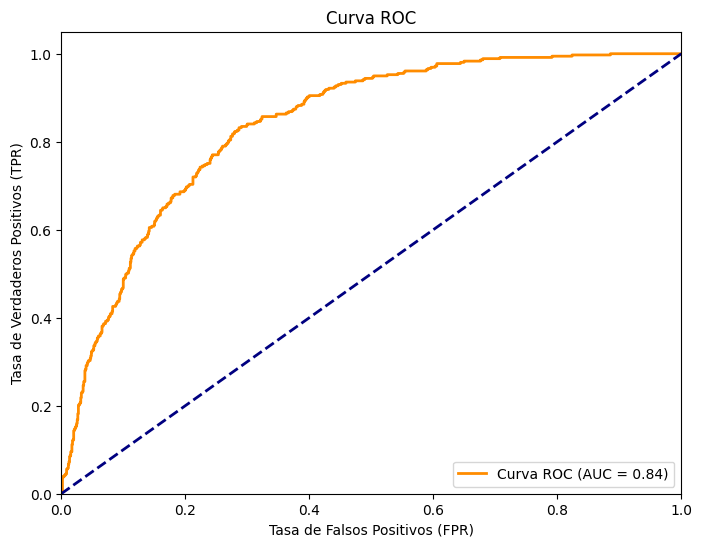

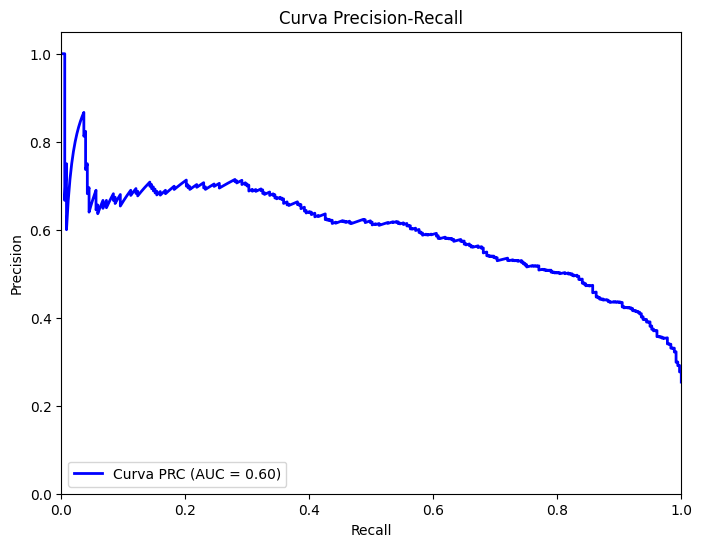

In [ ]:
#Instanciamos el modelo de regresion logistica
model = LogisticRegression(random_state=40)

#Ajustamos el modelo a los datos
model.fit(X_train,y_train)

#Realizamos predicciones
y_pred = model.predict(X_test)

#Calculamos la precision global del modelo
acuraccy = accuracy_score(y_test,y_pred)
print("Precision global del Modelo (acuraccy):",round(acuraccy,3))
print("")

#Calcula y muestra la matriz de confusion
confusion = confusion_matrix(y_test,y_pred)
print("Matriz de confusion:")
print(confusion)
print("")

#Genera un informe de clasificacion que incluye precision, recall y f1 score
report_logistic = classification_report(y_test,y_pred)
print("Informe de clasificacion:")
print(report_logistic)

#EVALUACION CON CURVA AUC-ROC Y AUC PR

#Obtener las probabilidades de prediccion
y_prob = model.predict_proba(X_test)[:,1]

#Calcular el AUC-ROC
roc_auc  = roc_auc_score(y_test,y_prob)
print("AUC-ROC:",roc_auc)

#Calcular el AUC-PR
auc_pr = average_precision_score(y_test,y_prob)
print("AUC-PR:",auc_pr)

# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)

# Calcular la curva PRC
precision, recall, thresholds_prc = precision_recall_curve(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Graficar la curva PRC
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PRC (AUC = %0.2f)' % auc_pr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Mostrar las curvas ROC y PRC
plt.show()

**Analisis de resultados preliminares:**
**El modelo de manera global presenta un 79% de precisión, lo cual es bastante bueno a nivel macro. Sin embargo, al visualizar la matriz de confusión, podemos ver que tanto la precision y el recall de la clase minoritaria 1 (fugado), es mucho menor a la clase 0, lo que nos indica que el modelo no tiene ni la precision ni la sensibilidad para capturar todos los clientes que son realmente fugados.**

**Curvas ROC y PR : La curva AUC-ROC tiene buen rendimiento, sin embargo debido al desbalance de clases, debemos utilizar la AUC-PR. Esta última, presenta un 60% de rendimiento sobre la capacidad de clasificacion de los verdaderos positivos (fugados). A pesar de que este numero es bajo, intentaremos mejorar el algoritmo aplicando un smote para ver si mejoran las metricas.**

In [ ]:
# Aplicamos SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=40)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ajustamos el modelo de regresión logística con los datos después de aplicar SMOTE
log_reg_smote = LogisticRegression(random_state=40)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Realizamos predicciones sobre el conjunto de datos de entrenamiento con SMOTE
y_pred_train_smote = log_reg_smote.predict(X_train_resampled)

# Realizamos predicciones sobre el conjunto de datos de prueba
y_pred_test = log_reg_smote.predict(X_test)

# Calculamos AUC-ROC y AUC-PR con SMOTE en los datos de entrenamiento
roc_auc_smote_train = roc_auc_score(y_train_resampled, y_pred_train_smote)
average_precision_smote_train = average_precision_score(y_train_resampled, y_pred_train_smote)

# Calculamos AUC-ROC y AUC-PR con SMOTE en los datos de prueba
auc_test = roc_auc_score(y_test, y_pred_test)
pr_test = average_precision_score(y_test, y_pred_test)

# Calculamos la precisión global con SMOTE en los datos de entrenamiento
accuracy_smote_train = accuracy_score(y_train_resampled, y_pred_train_smote)

# Calculamos la precisión global los datos de prueba
accuracy_test_log = accuracy_score(y_test, y_pred_test)

# Printeamos los resultados
print("RESULTADOS CON SMOTE TRAIN")
print("AUC ROC CON SMOTE (TRAIN):", roc_auc_smote_train)
print("AUC PR CON SMOTE (TRAIN):", average_precision_smote_train)
print("Accuracy con SMOTE (TRAIN):", accuracy_smote_train)
print("")

print("RESULTADOS TEST")
print("AUC ROC TEST:", auc_test)
print("AUC PR TEST:", pr_test)
print("Accuracy TEST:", accuracy_test_log)
print("")

#Genera un informe de clasificacion que incluye precision, recall y f1 score EN TRAIN
report = classification_report(y_train_resampled,y_pred_train_smote)
print("Informe de clasificacion TRAIN:")
print(report)
print("")
#Genera un informe de clasificacion que incluye precision, recall y f1 score EN TEST
report_test_logistic = classification_report(y_test,y_pred_test,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TEST:")
print(report_test_logistic)

RESULTADOS CON SMOTE TRAIN
AUC ROC CON SMOTE (TRAIN): 0.7712132263554583
AUC PR CON SMOTE (TRAIN): 0.7040696939651276
Accuracy con SMOTE (TRAIN): 0.7712132263554583

RESULTADOS TEST
AUC ROC TEST: 0.7641176470588236
AUC PR TEST: 0.4449987870246292
Accuracy TEST: 0.7334754797441365

Informe de clasificacion TRAIN:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4113
           1       0.75      0.81      0.78      4113

    accuracy                           0.77      8226
   macro avg       0.77      0.77      0.77      8226
weighted avg       0.77      0.77      0.77      8226


Informe de clasificacion TEST:
              precision    recall  f1-score   support

  No fugados       0.92      0.70      0.80      1050
     Fugados       0.49      0.83      0.61       357

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.81      0.73      0.75      1407



**Resultados finales Algoritmo supervizado de regresion logística:**

Luego del Smote, los resultados en los datos de entrenamiento mejoraron considerablemente, llegando  aun 70% de rendimiento en AUC-PR, lo cual nos indica que el algoritmo mejoró notablemente su precision y sensibilidada para idenfificar los clientes fugados. Sin embargo, a la hora de entregarle al algoritmo nuevos datos como test, su desempeño baja a casi un 44% AUC-PR, lo que nos indica que estamos frente a un problema de overfitting, ya que debido a la poca cantidad de data de solo 7000 registros, el modelo se ajusta tan bien a los datos con los que fue entrenado, que al ver datos nuevos no es capaz de clasificar correctamente estos.

Si visualizamos el informe de clasificacion sobre test y train, podemos confirmar lo mismo que vimos en AUC, el modelo tiene mayor precision en test, sin embargo en train, tiene mejor sensibilidad, a pesar de que su f1 score es menor.

Como posibles soluciones, sería primero poder obtener mayor cantidad de data, ya que 7000 registros son muy pocos para entrenar correctamente el algoritmo y logre clasificar correctamente los fugados, sin embargo exploraremos otros 2 algoritmos para ver si funcionan de mejor manera.

***Algoritmo 2 : Supervisado KNN***:

In [ ]:
#Primero hacemos validacion cruzada para conocer cual es el mejor valor de k neighboors a utilizar
k_values = range(1, 50)
#Definimos el numero de vecinos a testear
param_grid = {'n_neighbors': k_values}

#Iniciamos el clasificador
knn= KNeighborsClassifier()

#Realizamos la busqueda a través de la grilla sobre los numeros a testear
grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy') #Usaremos 5 folds, ya que la data tiene solo 7000 registros
grid_search.fit(X_train,y_train) #Utilizaremos la data con smote

#Obtenemos el mejor valor de K vecinos
best_k = grid_search.best_params_["n_neighbors"]
print("El mejor valor de K luego de la validación cruzada es:",best_k)

El mejor valor de K luego de la validación cruzada es: 36


El mejor valor de K es: 35


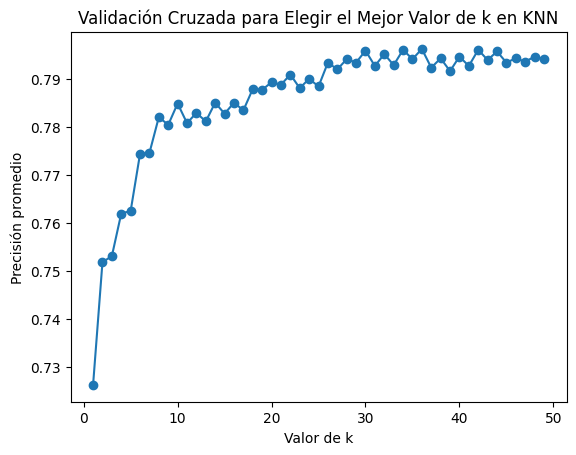

In [ ]:
# Lista para almacenar las precisiones promedio
mean_scores = []

# Valores de k a probar
k_values = range(1, 50)

# Realizar validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_scores.append(np.mean(scores)) #Se calcula la precisión promedio
    max_score = np.argmax(mean_scores)

print("El mejor valor de K es:",max_score)
# Ploteamos la precisión promedio en función de k
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Precisión promedio')
plt.title('Validación Cruzada para Elegir el Mejor Valor de k en KNN')
plt.show()

**Ambas metricas nos permmiten definir que el mejor numero de hiperparametro k es entre 35-36, por lo que usaremos 36 para el algoritmo**

In [ ]:
#Instanciamos el algoritmo y lo ajustamos a la data de entrenamiento con SMOTE
knn_train = KNeighborsClassifier(n_neighbors=36).fit(X_train_resampled,y_train_resampled)

#Predicciones sobre la data de entrenamiento
y_train_pred = knn_train.predict(X_train_resampled)

#Informe de clasificacion que incluye precision, recall y f1 score EN TRAIN
report_train = classification_report(y_train_resampled,y_train_pred,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TRAIN:")
print("")
print(report_train)

#Instanciamos el algoritmo y lo ajustamos a la data test
knn_test = KNeighborsClassifier(n_neighbors=36).fit(X_test,y_test)

#Predicciones sobre la data de entrenamiento
y_test_pred = knn_test.predict(X_test)

#Informe de clasificacion que incluye precision, recall y f1 score EN TEST
report_test_knn = classification_report(y_test,y_test_pred,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TEST:")
print("")
print(report_test_knn)

# Calculamos la precisión global TRAIN
accuracy_smote_train = accuracy_score(y_train_resampled, y_train_pred)

# Calculamos la precisión global TEST
accuracy_test_knn = accuracy_score(y_test, y_test_pred)

#Calculamos AUC-ROC-PR
auc_test_knn = roc_auc_score(y_test, y_pred_test)
pr_test_knn = average_precision_score(y_test, y_pred_test)



Informe de clasificacion TRAIN:

              precision    recall  f1-score   support

  No fugados       0.84      0.68      0.75      4113
     Fugados       0.73      0.87      0.79      4113

    accuracy                           0.77      8226
   macro avg       0.78      0.77      0.77      8226
weighted avg       0.78      0.77      0.77      8226

Informe de clasificacion TEST:

              precision    recall  f1-score   support

  No fugados       0.86      0.88      0.87      1050
     Fugados       0.62      0.57      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



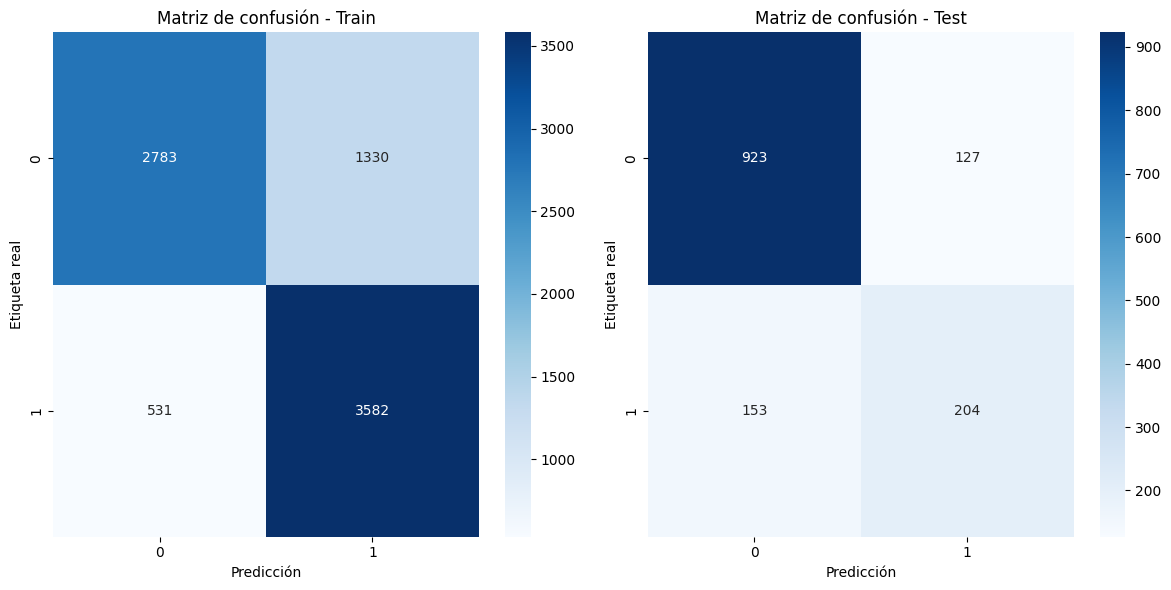

In [ ]:
#Visualizamos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para train
# Confusion matrix para train
cf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
sns.heatmap(cf_matrix_train, annot=True, ax=ax1, cmap='Blues', fmt='g')
ax1.set_title('Matriz de confusión - Train')
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Etiqueta real')

# Gráfico para test
# Confusion matrix para test
cf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix_test, annot=True, ax=ax2, cmap='Blues', fmt='g')
ax2.set_title('Matriz de confusión - Test')
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Etiqueta real')

# Ajustamos el layout
plt.tight_layout()
plt.show()


**Resultados del algoritmo KNN:**
**Al igual que con el algoritmo de regresion logistica, KNN tiene mucho mejor rendimiento sobre los datos de entrenamiento en cuanto a precisión y sensibilidada para capturar y clasificar los clientes fugados, teniendo un f1score de casi 80%, lo que es bastante positivo. Sin embargo, al entregarle la data de test, su rendimiento cae tanto en precision y recall, disminuyendo su f1score casi 10%, llegando a 59%, lo cual se acerca demasiado a un algoritmo que tiene la misma capacidad predictiva que el azar. Tambien hay que tener en consideracion que la data de entrenamiento esta con smote, en cambio la data test tiene mucho desbalance de clase, por lo tanto es esperable que su rendimiento decaiga.**

***Algoritmo 3: Decision Tree***

In [ ]:
#Primero haremos la busqueda de los mejores hiperparametros

# Definir los valores a probar para los hiperparámetros
param_grid_tree = {
    'max_depth': [3, 5, 7,9, None],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2, 4,8,10],}

# Definir el árbol de decisión
tree = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión con los mejores hiperparámetros: 0.7882666666666667


In [ ]:
# Definir los valores óptimos para los hiperparámetros
optimal_max_depth = 5
optimal_min_samples_leaf = 4
optimal_min_samples_split = 2

# Definir el clasificador con los valores óptimos
tree = DecisionTreeClassifier(
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_split,
    min_samples_leaf=optimal_min_samples_leaf
)

#Entrenamos el modelo y lo ajustamos
tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [ ]:
#Predicciones sobre la data de entrenamiento
y_train_pred = tree.predict(X_train_resampled)

#Informe de clasificacion que incluye precision, recall y f1 score EN TRAIN
report_train = classification_report(y_train_resampled,y_train_pred,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TRAIN:")
print("")
print(report_train)

#Predicciones sobre la data de test
y_test_pred = tree.predict(X_test)

#Informe de clasificacion que incluye precision, recall y f1 score EN TEST
report_test_arbol = classification_report(y_test,y_test_pred,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TEST:")
print("")
print(report_test_arbol)

#Calculamos AUC-ROC-PR
auc_test_tree = roc_auc_score(y_test, y_pred_test)
pr_test_tree = average_precision_score(y_test, y_pred_test)

Informe de clasificacion TRAIN:

              precision    recall  f1-score   support

  No fugados       0.78      0.79      0.79      4113
     Fugados       0.79      0.78      0.79      4113

    accuracy                           0.79      8226
   macro avg       0.79      0.79      0.79      8226
weighted avg       0.79      0.79      0.79      8226

Informe de clasificacion TEST:

              precision    recall  f1-score   support

  No fugados       0.91      0.77      0.84      1050
     Fugados       0.54      0.76      0.63       357

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407



Resultados Decision Tree:
Este algoritmo en general presenta mejores resultados a nivel de precision y recall, llegando a un f1score de 79& en entrenamiento y 63% en test, lo que hace que hasta el momento sea el algoritmo que mejor detecta y clasifica los fugados en test.

**Algoritmo 4: Naive Bayes**

In [ ]:
#Intanciamos el algoritmo
naive = GaussianNB()
#Ajustamos con los datos de entrenamientos
naive.fit(X_train_resampled,y_train_resampled)


GaussianNB()

In [ ]:
#A pesar de que naive bayes no tiene hiperparametros para modificar, tambien podemos realizar validacion cruzada para ver como se comporta con nuevos datos
cv_scores = cross_val_score(naive,X_train_resampled,y_train_resampled,cv=5)
print("Puntajes de la validacion cruzada de 5 folds",cv_scores
      )
print("Promedio de rendimiento del modelo:",cv_scores.mean())

Puntajes de la validacion cruzada de 5 folds [0.72478736 0.76109422 0.74164134 0.7550152  0.74164134]
Promedio de rendimiento del modelo: 0.7448358921138839


In [ ]:
#Predicciones sobre la data de entrenamiento
y_train_pred = naive.predict(X_train_resampled)

#Informe de clasificacion que incluye precision, recall y f1 score EN TRAIN
report_train = classification_report(y_train_resampled,y_train_pred,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TRAIN:")
print("")
print(report_train)

#Predicciones sobre la data de test
y_test_pred = naive.predict(X_test)

#Informe de clasificacion que incluye precision, recall y f1 score EN TEST
report_test_naive = classification_report(y_test,y_test_pred,target_names=["No fugados","Fugados"]) #y_test son las etiquetas reales
print("Informe de clasificacion TEST:")
print("")
print(report_test_naive)

#Calculamos AUC-ROC-PR
auc_test_naive = roc_auc_score(y_test, y_pred_test)
pr_test_naive = average_precision_score(y_test, y_pred_test)

Informe de clasificacion TRAIN:

              precision    recall  f1-score   support

  No fugados       0.81      0.64      0.72      4113
     Fugados       0.70      0.85      0.77      4113

    accuracy                           0.74      8226
   macro avg       0.75      0.74      0.74      8226
weighted avg       0.75      0.74      0.74      8226

Informe de clasificacion TEST:

              precision    recall  f1-score   support

  No fugados       0.93      0.62      0.74      1050
     Fugados       0.44      0.87      0.58       357

    accuracy                           0.68      1407
   macro avg       0.69      0.75      0.66      1407
weighted avg       0.81      0.68      0.70      1407



**Resultados Globales luego de testear los 4 algoritmos.**

In [ ]:
print("Informe de clasificación Regresion Logistica:")
print(report_test_logistic)
print("")
print("Informe de clasificación KNN:")
print(report_test_knn)
print("")
print("Informe de clasificación Decision Tree:")
print(report_test_arbol)
print("")
print("Informe de clasificación Naive Bayes:")
print(report_test_naive)

Informe de clasificación Regresion Logistica:
              precision    recall  f1-score   support

  No fugados       0.92      0.70      0.80      1050
     Fugados       0.49      0.83      0.61       357

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.81      0.73      0.75      1407


Informe de clasificación KNN:
              precision    recall  f1-score   support

  No fugados       0.86      0.88      0.87      1050
     Fugados       0.62      0.57      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407


Informe de clasificación Decision Tree:
              precision    recall  f1-score   support

  No fugados       0.91      0.77      0.84      1050
     Fugados       0.54      0.76      0.63       357

    accuracy                           0.77      1407
   macro a

*Resultados sobre los datos de TEST por cada algoritmo para detectar a los clientes fugados

*   Modelo con mejor accuracy, o precision global = **KNN**
*   Modelo con mejor precision = **KNN**
*   Modelo con mejor recall/sens = **Naive Bayes**
*   Modelo con mejor f1score = **Decision Tree**


**Conclusiones: El algoritmo de Decision Tree es el que tiene las metricas de evaluacion más balanceadas a la hora de evaluar, detectar y clasificar sobre nueva data en base a todas las evaluaciones ya mostradas. Sería importante poder obtener más data y así entrenar de mejor manera el modelo para obtener mejores desempeños e incluso pasar a un modelo de entrenamiento de 70-30 o 60-40 para que el modelo pueda mejorar su capacidad predictiva a la hora de encontrarse con nueva data, aunque con u f1 score de 63% y un accuracy de 77%, no son metricas malas para ser entrenado con poca data**